In [20]:
# License: BSD 3 clause

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

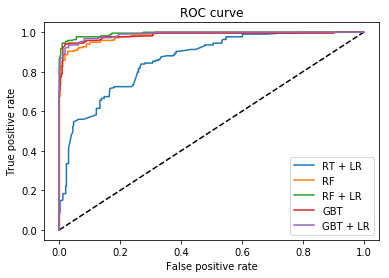

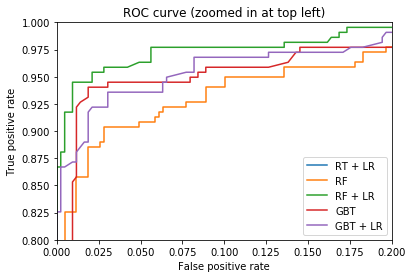

In [21]:
n_estimator = 10
#load data
data = pd.read_csv('test_kinetic.csv')
test = data[['label','waist_tx','waist_ty','waist_tz','waist_rx','waist_ry','waist_rz','chest_tx','chest_ty','chest_tz','chest_rx','chest_ry','chest_rz','upperLeg_L_tx','upperLeg_L_ty','upperLeg_L_tz','upperLeg_L_rx','upperLeg_L_ry','upperLeg_L_rz','lowerLeg_L_tx','lowerLeg_L_ty','lowerLeg_L_tz','lowerLeg_L_rx','lowerLeg_L_ry','lowerLeg_L_rz','foot_L_tx','foot_L_ty','foot_L_tz','foot_L_rx','foot_L_ry','foot_L_rz','upperLeg_R_tx','upperLeg_R_ty','upperLeg_R_tz','upperLeg_R_rx','upperLeg_R_ry','upperLeg_R_rz','lowerLeg_R_tx','lowerLeg_R_ty','lowerLeg_R_tz','lowerLeg_R_rx','lowerLeg_R_ry','lowerLeg_R_rz','foot_R_tx','foot_R_ty','foot_R_tz','foot_R_rx','foot_R_ry','foot_R_rz','upperArm_L_tx','upperArm_L_ty','upperArm_L_tz','upperArm_L_rx','upperArm_L_ry','upperArm_L_rz','foreArm_L_tx','foreArm_L_ty','foreArm_L_tz','foreArm_L_rx','foreArm_L_ry','foreArm_L_rz','hand_L_tx','hand_L_ty','hand_L_tz','hand_L_rx','hand_L_ry','hand_L_rz','upperArm_R_tx','upperArm_R_ty','upperArm_R_tz','upperArm_R_rx','upperArm_R_ry','upperArm_R_rz','foreArm_R_tx','foreArm_R_ty','foreArm_R_tz','foreArm_R_rx','foreArm_R_ry','foreArm_R_rz','hand_R_tx','hand_R_ty','hand_R_tz','hand_R_rx','hand_R_ry','hand_R_rz']]
test = test.dropna()

X = test[['waist_tx','waist_ty','waist_tz','waist_rx','waist_ry','waist_rz','chest_tx','chest_ty','chest_tz','chest_rx','chest_ry','chest_rz','upperLeg_L_tx','upperLeg_L_ty','upperLeg_L_tz','upperLeg_L_rx','upperLeg_L_ry','upperLeg_L_rz','lowerLeg_L_tx','lowerLeg_L_ty','lowerLeg_L_tz','lowerLeg_L_rx','lowerLeg_L_ry','lowerLeg_L_rz','foot_L_tx','foot_L_ty','foot_L_tz','foot_L_rx','foot_L_ry','foot_L_rz','upperLeg_R_tx','upperLeg_R_ty','upperLeg_R_tz','upperLeg_R_rx','upperLeg_R_ry','upperLeg_R_rz','lowerLeg_R_tx','lowerLeg_R_ty','lowerLeg_R_tz','lowerLeg_R_rx','lowerLeg_R_ry','lowerLeg_R_rz','foot_R_tx','foot_R_ty','foot_R_tz','foot_R_rx','foot_R_ry','foot_R_rz','upperArm_L_tx','upperArm_L_ty','upperArm_L_tz','upperArm_L_rx','upperArm_L_ry','upperArm_L_rz','foreArm_L_tx','foreArm_L_ty','foreArm_L_tz','foreArm_L_rx','foreArm_L_ry','foreArm_L_rz','hand_L_tx','hand_L_ty','hand_L_tz','hand_L_rx','hand_L_ry','hand_L_rz','upperArm_R_tx','upperArm_R_ty','upperArm_R_tz','upperArm_R_rx','upperArm_R_ry','upperArm_R_rz','foreArm_R_tx','foreArm_R_ty','foreArm_R_tz','foreArm_R_rx','foreArm_R_ry','foreArm_R_rz','hand_R_tx','hand_R_ty','hand_R_tz','hand_R_rx','hand_R_ry','hand_R_rz']]
y = test[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


In [22]:
#All
scores = []
cv = KFold(n_splits = 10, random_state = 42, shuffle = False)
for train_index, test_index in cv.split(X):
    #print('Train Index:', train_index, '\n')
    #print('Test Index:', test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index.tolist()], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    my_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    scores.append(my_model.score(X_test, y_test))

r_square = np.mean(scores)
adj_r = 1-(1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R Square:', r_square, '\n')
print('Adjusted R Square:', adj_r, '\n')


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

R Square: 0.6103318798449612 

Adjusted R Square: 0.5831457319271678 



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

model = SelectFromModel(gbc, prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]

print(feature_name)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['upperLeg_L_tx', 'upperLeg_L_ty', 'lowerLeg_R_ty', 'lowerLeg_R_rz',
       'foot_R_ty', 'upperArm_L_ry', 'upperArm_L_rz', 'foreArm_L_tx',
       'foreArm_L_rx', 'hand_L_tx', 'upperArm_R_rx', 'foreArm_R_tz'],
      dtype='object')


In [25]:
X = test[['upperLeg_L_tx', 'upperLeg_L_ty', 'lowerLeg_R_ty', 'lowerLeg_R_rz',
       'foot_R_ty', 'upperArm_L_ry', 'upperArm_L_rz', 'foreArm_L_tx',
       'foreArm_L_rx', 'hand_L_tx', 'upperArm_R_rx', 'foreArm_R_tz']]

scores = []
cv = KFold(n_splits = 10, random_state = 42, shuffle = False)
for train_index, test_index in cv.split(X):
    #print('Train Index:', train_index, '\n')
    #print('Test Index:', test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index.tolist()], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    my_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    scores.append(my_model.score(X_test, y_test))

r_square = np.mean(scores)
adj_r = 1-(1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R Square:', r_square, '\n')
print('Adjusted R Square:', adj_r, '\n')


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

R Square: 0.657624757751938 

Adjusted R Square: 0.6544049278875361 



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
